# Importing the Libraries

In [1]:
import tensorflow as tf # pip install tensorflow
import matplotlib.pyplot as plt # pip install matlpotlib
import cv2 # pip install opencv-python
import os # pip install os-sys
import numpy as np # pip install numpy

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import RMSprop

# Loading the Image

In [2]:
img = image.load_img("C:/Users/hp/OneDrive/Desktop/Supervised Learning files/training/cat/1.jpg") # path of the image

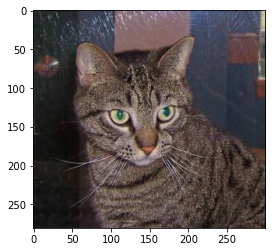

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:/Users/hp/OneDrive/Desktop/Supervised Learning files/training/cat/1.jpg") # inorder to visualize the 3D matrix

array([[[ 37,  41,  36],
        [ 38,  42,  37],
        [ 41,  42,  38],
        ...,
        [160, 198, 200],
        [160, 198, 200],
        [162, 201, 203]],

       [[ 39,  43,  38],
        [ 40,  44,  39],
        [ 42,  43,  39],
        ...,
        [167, 202, 205],
        [163, 201, 203],
        [163, 202, 204]],

       [[ 42,  46,  41],
        [ 42,  46,  41],
        [ 44,  45,  41],
        ...,
        [165, 200, 203],
        [159, 196, 200],
        [157, 194, 198]],

       ...,

       [[ 32,  31,  33],
        [ 29,  28,  30],
        [ 25,  24,  26],
        ...,
        [ 20,  28,  41],
        [ 16,  25,  35],
        [ 42,  51,  61]],

       [[ 33,  32,  34],
        [ 31,  30,  32],
        [ 26,  25,  27],
        ...,
        [ 23,  31,  44],
        [ 16,  25,  35],
        [ 46,  55,  65]],

       [[ 29,  28,  30],
        [ 27,  26,  28],
        [ 25,  24,  26],
        ...,
        [ 39,  48,  61],
        [ 17,  27,  37],
        [ 18,  28,  38]]

In [5]:
cv2.imread("C:/Users/hp/OneDrive/Desktop/Supervised Learning files/training/cat/1.jpg").shape

(281, 300, 3)

# Generating Training & Validation Dataset using ImageDataGenerator

In [6]:
train = ImageDataGenerator(rescale= 1/255) # to set the values of RGB in range [0,1]
validation = ImageDataGenerator(rescale= 1/255)

# Converting Training and Validation Images into a data set that can be fitted to Neural Network

In [7]:
train_dataset = train.flow_from_directory("C:/Users/hp/OneDrive/Desktop/Supervised Learning files/training", 
                                         target_size= (200,200),
                                         batch_size= 3,
                                         class_mode = 'binary') # binary - since there are only two labels ie cat & dog 

validation_dataset = validation.flow_from_directory("C:/Users/hp/OneDrive/Desktop/Supervised Learning files/validation", 
                                         target_size= (200,200),
                                         batch_size= 3,
                                         class_mode = 'binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [8]:
# for generating labels and data
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

# Defining Model using Convolutional Neural Network(CNN) with Max Pooling

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation= 'sigmoid')
                                    ]
                                    )

# Compiling the Model

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate = 0.001), metrics= ['accuracy'])

# Fitting the Model

In [12]:
model_fit = model.fit(train_dataset, steps_per_epoch= 3, epochs =80, validation_data= validation_dataset)

Epoch 1/80
3/3 [==============================] - 7s 2s/step - loss: 7.2340 - accuracy: 0.3333 - val_loss: 0.9795 - val_accuracy: 0.5000
Epoch 2/80
3/3 [==============================] - 2s 893ms/step - loss: 0.7593 - accuracy: 0.5556 - val_loss: 0.9297 - val_accuracy: 0.5000
Epoch 3/80
3/3 [==============================] - 2s 908ms/step - loss: 0.9707 - accuracy: 0.3333 - val_loss: 0.7153 - val_accuracy: 0.5000
Epoch 4/80
3/3 [==============================] - 2s 900ms/step - loss: 0.7462 - accuracy: 0.3333 - val_loss: 0.6851 - val_accuracy: 0.5500
Epoch 5/80
3/3 [==============================] - 2s 896ms/step - loss: 0.6975 - accuracy: 0.4444 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 6/80
3/3 [==============================] - 2s 888ms/step - loss: 0.7124 - accuracy: 0.5556 - val_loss: 0.6819 - val_accuracy: 0.5500
Epoch 7/80
3/3 [==============================] - 2s 896ms/step - loss: 0.6899 - accuracy: 0.4444 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 8/80
3/3 [=======

# Prediction

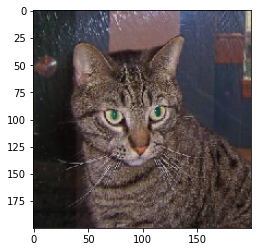

Cat


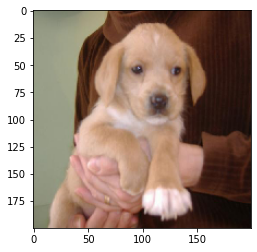

Dog


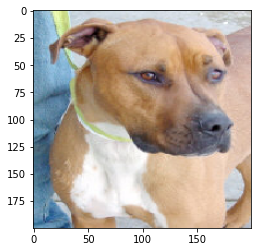

Dog


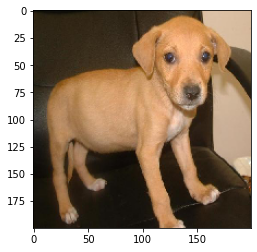

Dog


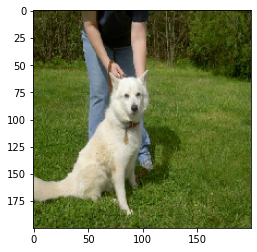

Dog


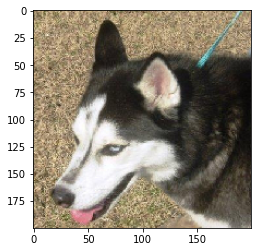

Dog


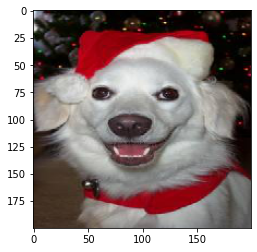

Dog


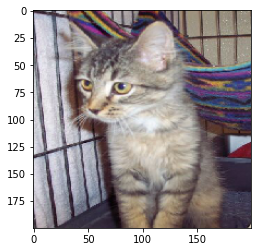

Cat


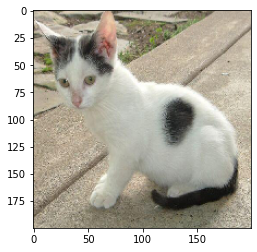

Cat


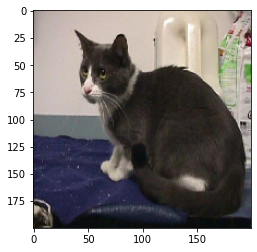

Cat


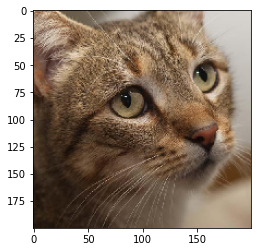

Cat


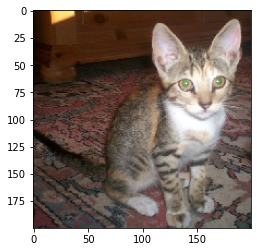

Cat


In [13]:
dir_path= 'C:/Users/hp/OneDrive/Desktop/Supervised Learning files/testing'

# for reading images from the folder
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size= (200,200))   # Loading the image
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    # for providing an extra dimension to the dataset
    X = np.expand_dims(X,axis =0)
    # to join the mutliple images 
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Cat")
    else:
        print("Dog")